# Vanilla Autoencoder

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [2]:
latent_dim = 64 

class Autoencoder(Model):
    def __init__(self, latent_dim):
        super(Autoencoder, self).__init__()
        self.latent_dim = latent_dim   
        self.encoder = tf.keras.Sequential([
            layers.Flatten(),
            layers.Dense(latent_dim, activation='relu')
        ])
        self.decoder = tf.keras.Sequential([
            layers.Dense(784, activation='sigmoid'),
            layers.Reshape((28, 28))
        ])
    
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = Autoencoder(latent_dim)

In [3]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0237 - val_loss: 0.0130
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0115 - val_loss: 0.0106
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0101 - val_loss: 0.0099
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0095 - val_loss: 0.0094
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0092 - val_loss: 0.0092
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0091 - val_loss: 0.0092
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0090 - val_loss: 0.0091
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0089 - val_loss: 0.0090
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0088 - val_loss: 0.0090
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.008

In [4]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

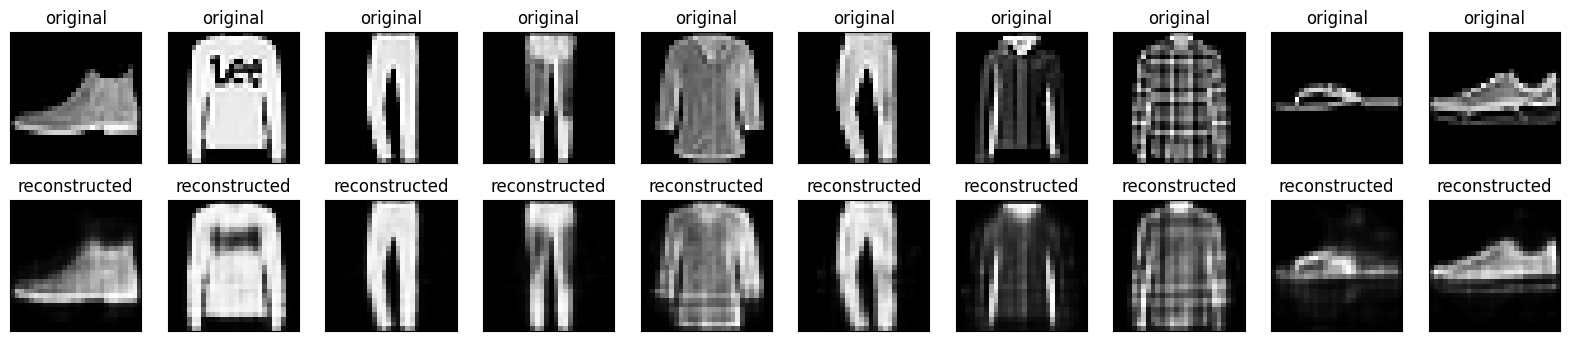

In [5]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.title("reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
import tensorflow as tf
tf.compat.v1.reset_default_graph()

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [7]:
latent_dim = 2 

class Autoencoder(Model):
    def __init__(self, latent_dim):
        super(Autoencoder, self).__init__()
        self.latent_dim = latent_dim   
        self.encoder = tf.keras.Sequential([
            layers.Flatten(),
            layers.Dense(128, activation='sigmoid'),
            layers.Dense(64, activation='sigmoid'),

            layers.Dense(latent_dim)
        ])
        self.decoder = tf.keras.Sequential([

            layers.Dense(64, activation='sigmoid'),
            layers.Dense(128, activation='sigmoid'),
            layers.Dense(784, activation='sigmoid'),
            layers.Reshape((28, 28))
        ])
    
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = Autoencoder(latent_dim)

In [8]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0534 - val_loss: 0.0366
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0344 - val_loss: 0.0324
Epoch 3/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0311 - val_loss: 0.0301
Epoch 4/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0293 - val_loss: 0.0289
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0284 - val_loss: 0.0282
Epoch 6/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0279 - val_loss: 0.0276
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0274 - val_loss: 0.0273
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0271 - val_loss: 0.0271
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0268 - val_loss: 0.0270
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.026

In [9]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

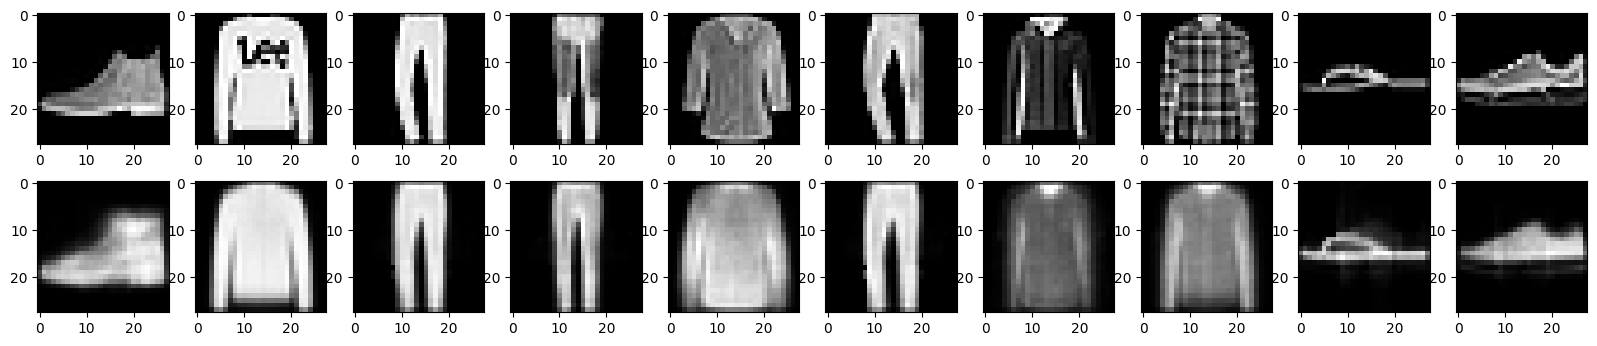

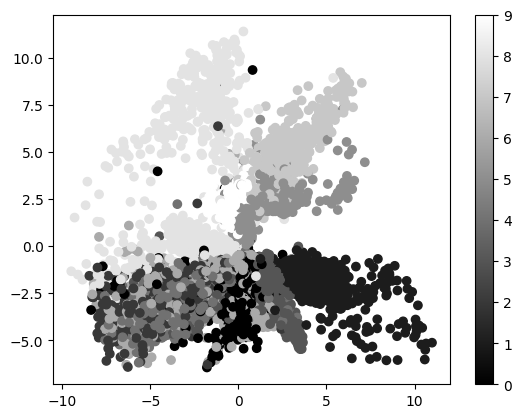

In [10]:
f, a = plt.subplots(2, 10, figsize=(20, 4))
for i in range(10):
    a[0][i].imshow(np.reshape(x_test[i], (28, 28)))
    a[1][i].imshow(np.reshape(decoded_imgs[i], (28, 28)))
plt.show()

plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], c=y_test)
plt.colorbar()
plt.show()

# CNN Autoencoder

In [11]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

print(x_train.shape)

(60000, 28, 28, 1)


In [12]:
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape) 
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape) 

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

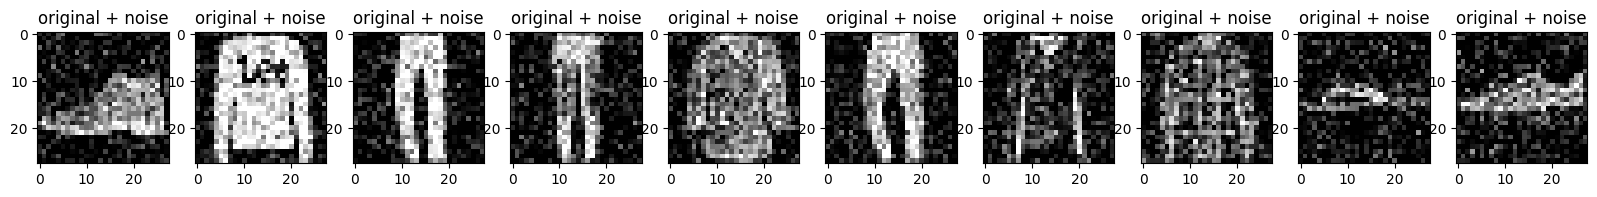

In [13]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
plt.show()

In [14]:
class Denoise(Model):
    def __init__(self):
        super(Denoise, self).__init__()
        self.encoder = tf.keras.Sequential([
            layers.Input(shape=(28, 28, 1)), 
            layers.Conv2D(16, (3,3), activation='relu', padding='same', strides=2),
            layers.Conv2D(8, (3,3), activation='relu', padding='same', strides=2)])
        
        self.decoder = tf.keras.Sequential([
            layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
            layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
            layers.Conv2D(1, kernel_size=(3,3), activation='sigmoid', padding='same')])
    
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = Denoise()
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [15]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/10
1875/1875 [==============================] - 32s 16ms/step - loss: 0.0167 - val_loss: 0.0099
Epoch 2/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0091 - val_loss: 0.0087
Epoch 3/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0083 - val_loss: 0.0081
Epoch 4/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0079 - val_loss: 0.0078
Epoch 5/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0076 - val_loss: 0.0076
Epoch 6/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0074 - val_loss: 0.0074
Epoch 7/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0073 - val_loss: 0.0073
Epoch 8/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0072 - val_loss: 0.0072
Epoch 9/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0072 - val_loss: 0.0073
Epoch 10/10
1875/1875 [==============================] - 31s 17m

In [16]:
autoencoder.encoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 8)           1160      
                                                                 
Total params: 1320 (5.16 KB)
Trainable params: 1320 (5.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
autoencoder.decoder.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_transpose (Conv2DTr  (None, 14, 14, 8)         584       
 anspose)                                                        
                                                                 
 conv2d_transpose_1 (Conv2D  (None, 28, 28, 16)        1168      
 Transpose)                                                      
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 1)         145       
                                                                 
Total params: 1897 (7.41 KB)
Trainable params: 1897 (7.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

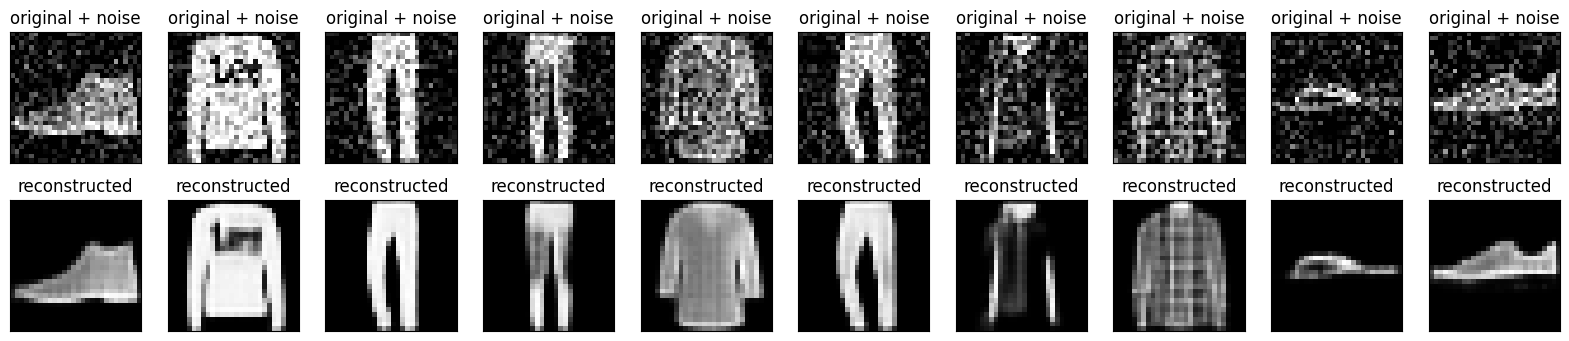

In [19]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    
    # display original + noise
    ax = plt.subplot(2, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()

# VAE

In [20]:
import os
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import Sequential, layers
from PIL import Image
from matplotlib import pyplot as plt



tf.random.set_seed(22)
np.random.seed(22)



def save_images(imgs, name):
    new_im = Image.new('L', (280, 280))

    index = 0
    for i in range(0, 280, 28):
        for j in range(0, 280, 28):
            im = imgs[index]
            im = Image.fromarray(im, mode='L')
            new_im.paste(im, (i, j))
            index += 1

    new_im.save(name)


h_dim = 20
batchsz = 512
lr = 1e-3


(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_train, x_test = x_train.astype(np.float32) / 255., x_test.astype(np.float32) / 255.
# we do not need label
train_db = tf.data.Dataset.from_tensor_slices(x_train)
train_db = train_db.shuffle(batchsz * 5).batch(batchsz)
test_db = tf.data.Dataset.from_tensor_slices(x_test)
test_db = test_db.batch(batchsz)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

z_dim = 10

class VAE(keras.Model):

    def __init__(self):
        super(VAE, self).__init__()

        # Encoder
        self.fc1 = layers.Dense(128)
        self.fc2 = layers.Dense(z_dim) # get mean prediction
        self.fc3 = layers.Dense(z_dim)

        # Decoder
        self.fc4 = layers.Dense(128)
        self.fc5 = layers.Dense(784)

    def encoder(self, x):

        h = tf.nn.relu(self.fc1(x))
        # get mean
        mu = self.fc2(h)
        # get variance
        log_var = self.fc3(h)

        return mu, log_var

    def decoder(self, z):

        out = tf.nn.relu(self.fc4(z))
        out = self.fc5(out)

        return out

    def reparameterize(self, mu, log_var):

        eps = tf.random.normal(log_var.shape)

        std = tf.exp(log_var*0.5)

        z = mu + std * eps
        return z

    def call(self, inputs, training=None):

        # [b, 784] => [b, z_dim], [b, z_dim]
        mu, log_var = self.encoder(inputs)
        # reparameterization trick
        z = self.reparameterize(mu, log_var)

        x_hat = self.decoder(z)

        return x_hat, mu, log_var


model = VAE()
model.build(input_shape=(4, 784))
optimizer = tf.optimizers.Adam(lr)

for epoch in range(1000):

    for step, x in enumerate(train_db):

        x = tf.reshape(x, [-1, 784])

        with tf.GradientTape() as tape:
            x_rec_logits, mu, log_var = model(x)

            rec_loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=x, logits=x_rec_logits)
            rec_loss = tf.reduce_sum(rec_loss) / x.shape[0]

            # compute kl divergence (mu, var) ~ N (0, 1)
            # https://stats.stackexchange.com/questions/7440/kl-divergence-between-two-univariate-gaussians
            kl_div = -0.5 * (log_var + 1 - mu**2 - tf.exp(log_var))
            kl_div = tf.reduce_sum(kl_div) / x.shape[0]

            loss = rec_loss + 1. * kl_div

        grads = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))


        if step % 100 == 0:
            print(epoch, step, 'kl div:', float(kl_div), 'rec loss:', float(rec_loss))


    # evaluation
    z = tf.random.normal((batchsz, z_dim))
    logits = model.decoder(z)
    x_hat = tf.sigmoid(logits)
    x_hat = tf.reshape(x_hat, [-1, 28, 28]).numpy() *255.
    x_hat = x_hat.astype(np.uint8)
    save_images(x_hat, 'vae_images/sampled_epoch%d.png'%epoch)

    x = next(iter(test_db))
    x = tf.reshape(x, [-1, 784])
    x_hat_logits, _, _ = model(x)
    x_hat = tf.sigmoid(x_hat_logits)
    x_hat = tf.reshape(x_hat, [-1, 28, 28]).numpy() *255.
    x_hat = x_hat.astype(np.uint8)
    save_images(x_hat, 'vae_images/rec_epoch%d.png'%epoch)



(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
0 0 kl div: 1.6033231019973755 rec loss: 545.53759765625
0 100 kl div: 15.700458526611328 rec loss: 287.755859375
1 0 kl div: 16.26912498474121 rec loss: 271.96002197265625
1 100 kl div: 15.635805130004883 rec loss: 256.9367980957031
2 0 kl div: 16.154083251953125 rec loss: 249.02001953125
2 100 kl div: 15.166132926940918 rec loss: 253.3090057373047
3 0 kl div: 15.310955047607422 rec loss: 249.93641662597656
3 100 kl div: 15.331652641296387 rec loss: 249.2141876220703
4 0 kl div: 15.108159065246582 rec loss: 244.7762908935547
4 100 kl div: 14.829122543334961 rec loss: 247.7986297607422
5 0 kl div: 14.358013153076172 rec loss: 238.7215576171875
5 100 kl div: 14.92251968383789 rec loss: 240.738037109375
6 0 kl div: 14.909439086914062 rec loss: 238.1415557861328
6 100 kl div: 15.701353073120117 rec loss: 241.4825439453125
7 0 kl div: 14.944245338439941 rec loss: 235.8372344970703
7 100 kl div: 14.958712577819824 rec loss: 234.451171875
8 0

KeyboardInterrupt: 